<a href="https://colab.research.google.com/github/ridhamel/Machine-Learning_Homework/blob/main/Week_3_ML_K_Nearest_Neighbor_Classifier_to_predict_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 #untuk KNN
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as knn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fruits = pd.read_table('fruit_data_with_colors.txt')

#checking first five rows of our dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# Membuat pemetaan dari nilai label ke nama label
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
# cek unique name yg sama dengan fruit_name
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [ ]:
# Menyipan semua data unique ke 4 dataframe yg beda
apple_data = fruits[fruits['fruit_name']=='apple']
orange_data= fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data = fruits[fruits['fruit_name']=='mandarin']

In [ ]:
print("Data Apple")
print("----------")
apple_data.head()

Data Apple
----------


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
print("Data Orange")
print("-----------")
orange_data.head()

Data Orange
-----------


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [ ]:
print("Data Orange")
print("-----------")
lemon_data.head()

Data Orange
-----------


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


In [ ]:
print("Data Orange")
print("-----------")
mandarin_data.head()

Data Orange
-----------


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


**Memvisualisasikan Data**

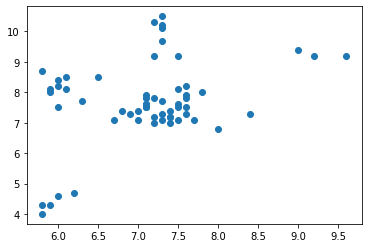

In [ ]:
# pada kolom lebar dan tinggi
plt.scatter(fruits['width'],fruits['height'])

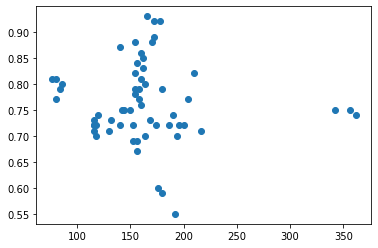

In [ ]:
#pada kolom berat dan warna
plt.scatter(fruits['mass'],fruits['color_score'])

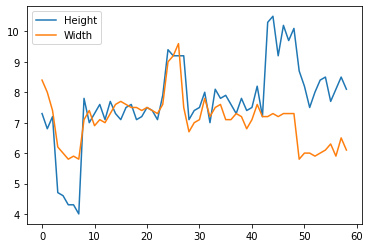

In [ ]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

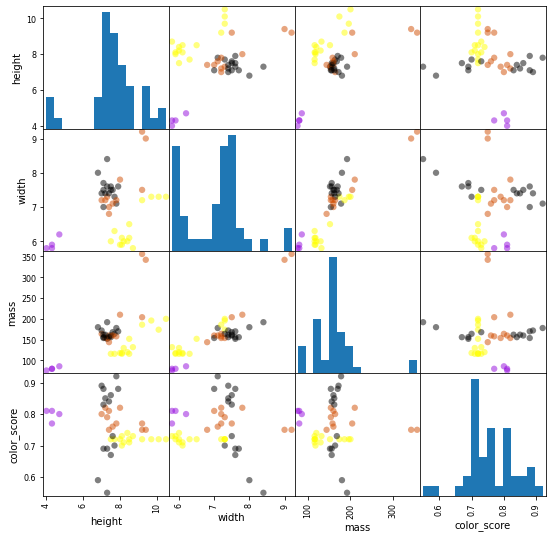

In [ ]:
#atau mennggunakan cm 
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

**Modelling**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Split dataset menjadi data train dan data test
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
# 75% dan 25%
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [ ]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [ ]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Score dengan KNN
knn.score(X_test, y_test)

0.5333333333333333

**Parameter yang digunakan adalah tinggi, berat dan lebar**

In [ ]:
height = 0
mass = 0
width = 0

ans = 'y'

while((ans=='y') or (ans=='Y')):

  print("Masukkan Tinggi Dari Buah : " )
  height=float(input())

  print("Masukkan Berat Dari Buah : " )
  mass=float(input())

  print("Masukkan Lebar Dari Buah : " )
  width=float(input())

  try_predict = knn.predict([[mass, width, height]])
  result = predct[try_predict[0]]
  
  print("Hasil Prediksi Buah Yaitu : ", result)

  print("\n\nApakah Anda Ingin Melakukan Prediksi Lagi (y/t) : ")
  ans = str(input())
  print("\n\n")

Masukkan Tinggi Dari Buah : 
5.5
Masukkan Berat Dari Buah : 
4.2
Masukkan Lebar Dari Buah : 
15
Hasil Prediksi Buah Yaitu :  mandarin


Apakah Anda Ingin Melakukan Prediksi Lagi (y/t) : 
y



Masukkan Tinggi Dari Buah : 
7.0
Masukkan Berat Dari Buah : 
80
Masukkan Lebar Dari Buah : 
5.2
Hasil Prediksi Buah Yaitu :  mandarin


Apakah Anda Ingin Melakukan Prediksi Lagi (y/t) : 
y



Masukkan Tinggi Dari Buah : 
8.5
Masukkan Berat Dari Buah : 
100
Masukkan Lebar Dari Buah : 
6.3
Hasil Prediksi Buah Yaitu :  lemon


Apakah Anda Ingin Melakukan Prediksi Lagi (y/t) : 
t





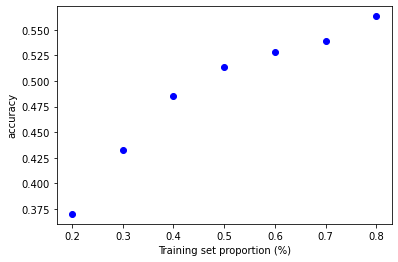

In [ ]:
# cek sensitivitas knn untuk proposi data test
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');